In [ ]:
import torch
from torchvision import datasets, transforms
import numpy as np
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import matplotlib.pyplot as plt
from torchvision.datasets import CIFAR10
from torch.utils.data import DataLoader
import optuna

In [ ]:
!pip install optuna

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 383.4/383.4 kB 7.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 233.6/233.6 kB 19.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.5/78.5 kB 2.4 MB/s eta 0:00:00


In [ ]:
train_data = CIFAR10(root='./data', train=True, download=True, transform=transforms.ToTensor())
test_data = CIFAR10(root='./data', train=False, download=True, transform=transforms.ToTensor())


train_dataloader = DataLoader(train_data, batch_size=64, shuffle=True)
test_dataloader = DataLoader(test_data,batch_size=64, shuffle=False)




100%|██████████| 170M/170M [00:02<00:00, 61.3MB/s]


Extracting ./data/cifar-10-python.tar.gz to ./data
Files already downloaded and verified


In [ ]:
class Autoencoder(nn.Module):
  def __init__(self,):
    super().__init__()

    self.encoder = nn.Sequential(
      nn.Conv2d(3,16, kernel_size=3, stride=2, padding=1),
      nn.ReLU(),
      # nn.MaxPool2d(kernel_size=2, stride=2),

      nn.Conv2d(16, 32, kernel_size=3, stride=2, padding=1),
      nn.ReLU(),
      # nn.MaxPool2d(kernel_size=2, stride=2),

      nn.Conv2d(32, 64, kernel_size=3, stride=2, padding=1),
      nn.ReLU(),
      # nn.MaxPool2d(kernel_size=2, stride=2),

      nn.Conv2d(64, 128, kernel_size=3, stride=2, padding=1),
      nn.ReLU(),
      # nn.MaxPool2d(kernel_size=2, stride=2),


    )
    self.decoder = nn.Sequential(
        nn.ConvTranspose2d(in_channels=128, out_channels=64, kernel_size=3, stride=2, padding=1, output_padding=1),
        nn.ReLU(),
        nn.ConvTranspose2d(in_channels=64, out_channels=32, kernel_size=3, stride=2, padding=1, output_padding=1),
        nn.ReLU(),
        nn.ConvTranspose2d(in_channels=32, out_channels=16, kernel_size=3, stride=2, padding=1, output_padding=1),
        nn.ReLU(),
        nn.ConvTranspose2d(in_channels=16, out_channels=3, kernel_size=3, stride=2, padding=1, output_padding=1),
        nn.Sigmoid(),


    )

  def forward(self,x):
    x = self.encoder(x)
    x = self.decoder(x)
    return x



In [ ]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = Autoencoder().to(device)
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

In [ ]:
#train loop

epochs = 20
for epoch in range(epochs):
  model.train()
  total_loss = 0
  for image, labels in train_dataloader:
    image = image.to(device)
    optimizer.zero_grad()
    output = model(image)
    loss = criterion(output,image)
    loss.backward()
    optimizer.step()

    total_loss = total_loss + loss.item()

    avg_loss = total_loss / len(train_dataloader)

    print(f"Epoch [{epoch+1}/{epochs}], Loss: {avg_loss:.4f}")





Streaming output truncated to the last 5000 lines.
Epoch [14/20], Loss: 0.0027
Epoch [14/20], Loss: 0.0027
Epoch [14/20], Loss: 0.0027
Epoch [14/20], Loss: 0.0027
Epoch [14/20], Loss: 0.0027
Epoch [14/20], Loss: 0.0027
Epoch [14/20], Loss: 0.0027
Epoch [14/20], Loss: 0.0027
Epoch [14/20], Loss: 0.0028
Epoch [14/20], Loss: 0.0028
Epoch [14/20], Loss: 0.0028
Epoch [14/20], Loss: 0.0028
Epoch [14/20], Loss: 0.0028
Epoch [14/20], Loss: 0.0028
Epoch [14/20], Loss: 0.0028
Epoch [14/20], Loss: 0.0028
Epoch [14/20], Loss: 0.0028
Epoch [14/20], Loss: 0.0028
Epoch [14/20], Loss: 0.0028
Epoch [14/20], Loss: 0.0028
Epoch [14/20], Loss: 0.0028
Epoch [14/20], Loss: 0.0028
Epoch [14/20], Loss: 0.0028
Epoch [14/20], Loss: 0.0028
Epoch [14/20], Loss: 0.0028
Epoch [14/20], Loss: 0.0028
Epoch [14/20], Loss: 0.0029
Epoch [14/20], Loss: 0.0029
Epoch [14/20], Loss: 0.0029
Epoch [14/20], Loss: 0.0029
Epoch [14/20], Loss: 0.0029
Epoch [14/20], Loss: 0.0029
Epoch [14/20], Loss: 0.0029
Epoch [14/20], Loss: 0.00

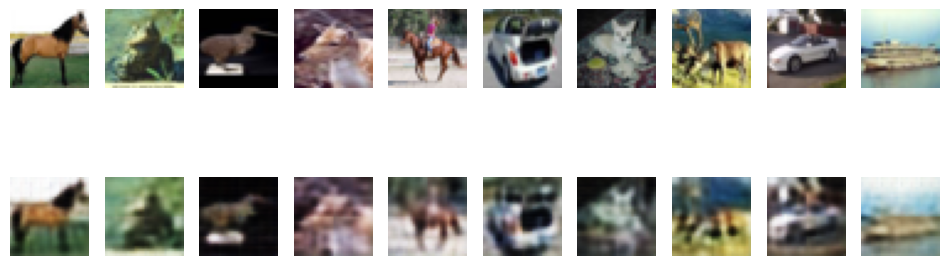

In [ ]:
import matplotlib.pyplot as plt
import torch

# Get a batch of test images
images, _ = next(iter(train_dataloader))
images = images.to(device)

# Forward pass through the autoencoder
with torch.no_grad():
    reconstructed = model(images)

# Move tensors to CPU for visualization
images = images.cpu().numpy().transpose(0, 2, 3, 1)  # (batch, H, W, C)
reconstructed = reconstructed.cpu().numpy().transpose(0, 2, 3, 1)

# Display original and reconstructed images
fig, axes = plt.subplots(2, 10, figsize=(12, 4))

for i in range(10):
    axes[0, i].imshow(images[i])  # Original
    axes[0, i].axis("off")

    axes[1, i].imshow(reconstructed[i])  # Reconstructed
    axes[1, i].axis("off")

plt.show()
